<a href="https://colab.research.google.com/github/Addy4336/Candidate_Dropout_Prediction/blob/main/Candidate_Dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:

# Load the dataset
file_path = 'candidate_dropout_dataset.csv'
df = pd.read_csv(file_path)
df.head()

,experience,test_score,form_time,follow_ups,is_referred,resume_score,timezone_diff,past_startups,email_response_delay,final_ctc_expectation,dropout
0,0.94,0.73,2.15,2,1,0.57,12,0,0.27,10.12,0
1,6.02,0.50,7.81,2,0,6.23,2,3,2.86,23.47,0
2,2.63,0.76,8.88,1,0,1.72,5,2,4.88,10.13,0
3,1.83,0.79,2.02,3,0,3.56,1,0,9.18,14.54,0
4,0.34,0.78,6.49,1,0,0.00,6,2,5.74,13.43,0


Missing Values per column:
 experience               0
test_score               0
form_time                0
follow_ups               0
is_referred              0
resume_score             0
timezone_diff            0
past_startups            0
email_response_delay     0
final_ctc_expectation    0
dropout                  0
dtype: int64


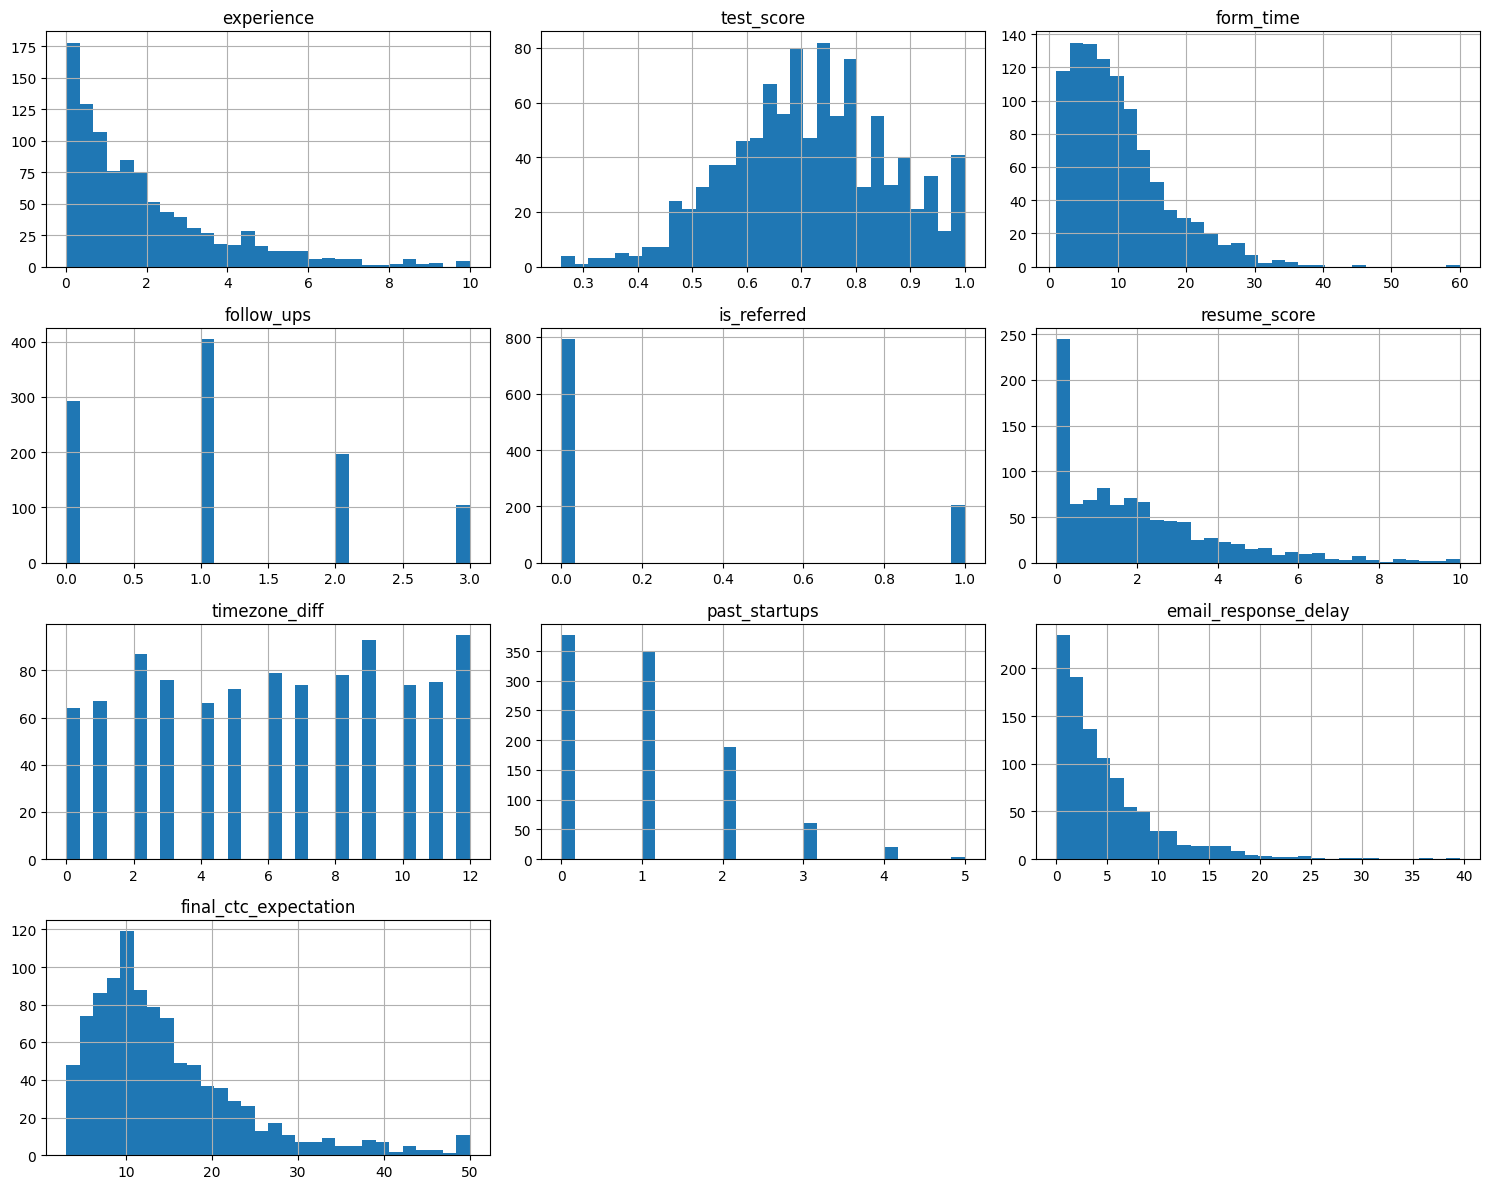

In [ ]:
# Missing values check
print("Missing Values per column:\n",df.isnull().sum())

numerical_cols = df.select_dtypes(include=np.number).columns.to_list()
numerical_cols.remove('dropout') # Exclude the target variable

# Histograms to detect skewness and outliers
df[numerical_cols].hist(figsize=(15, 12),bins = 30)
plt.tight_layout()
plt.show()


In [ ]:
# Outlier handling using IQR

def cap_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1-1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower,
                np.where(df[col] > upper, upper, df[col]))
for col in ['test_score', 'form_time', 'email_response_delay', 'final_ctc_expectation']:
  cap_outliers(col)

# Feature Scaling

scale_cols = ['experience', 'test_score', 'form_time', 'resume_score',
              'email_response_delay', 'final_ctc_expectation']
scaler = StandardScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])

# Preview the cleaned dataset
df.head()


,experience,test_score,form_time,follow_ups,is_referred,resume_score,timezone_diff,past_startups,email_response_delay,final_ctc_expectation,dropout
0,-0.525969,0.110775,-1.203731,2,1,-0.720977,12,0,-1.065045,-0.518320,0
1,2.156844,-1.481616,-0.331207,2,0,2.115226,2,3,-0.420594,1.170226,0
2,0.366542,0.318478,-0.166260,1,0,-0.144717,5,2,0.082028,-0.517056,0
3,-0.055948,0.526182,-1.223771,3,0,0.777300,1,0,1.151965,0.040734,0
4,-0.842836,0.456947,-0.534693,1,0,-1.006602,6,2,0.296015,-0.099662,0


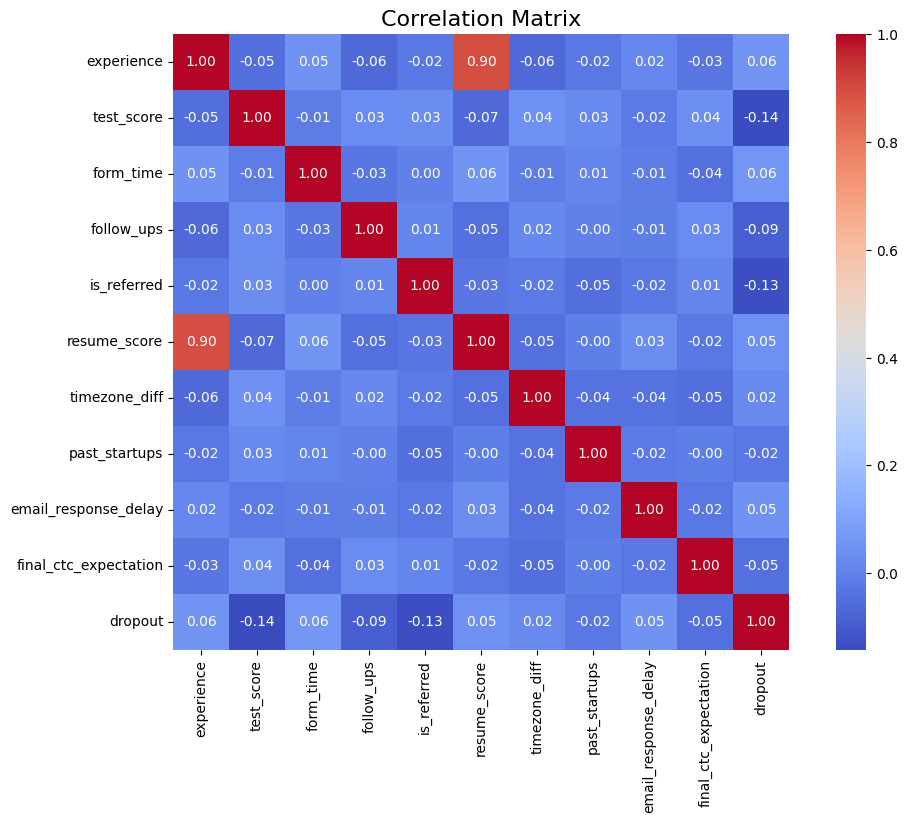

In [ ]:
# Coorelation Heatmap

plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Matrix", fontsize=16)
plt.show()


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = df.drop(columns=['dropout', 'is_referred', 'follow_ups'])
X = add_constant(X)  # Add constant term for VIF

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data.sort_values(by="VIF", ascending=False)
# Drop resume_score due to multicollinearity with experience
df.drop(columns=['resume_score'], inplace=True)



<ipython-input-7-77ca5ba7ca60>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_temp.groupby('bin')[target].mean()


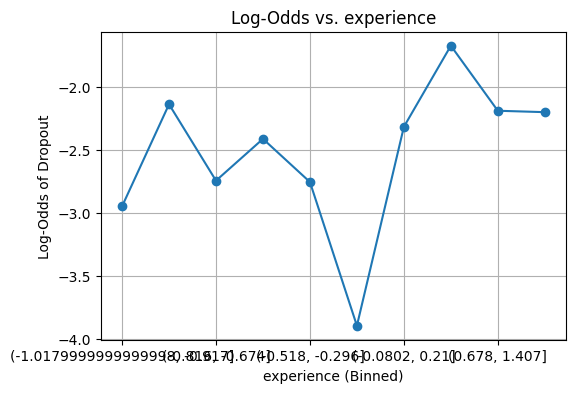

<ipython-input-7-77ca5ba7ca60>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_temp.groupby('bin')[target].mean()


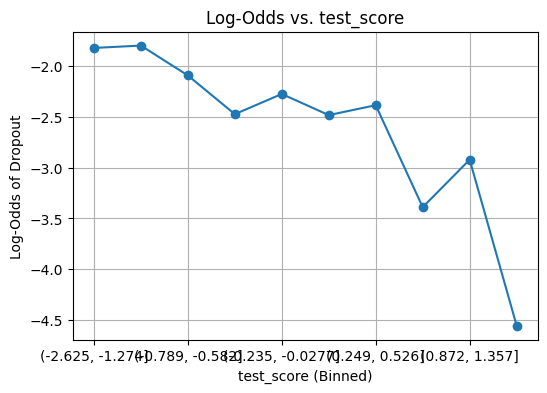

<ipython-input-7-77ca5ba7ca60>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_temp.groupby('bin')[target].mean()


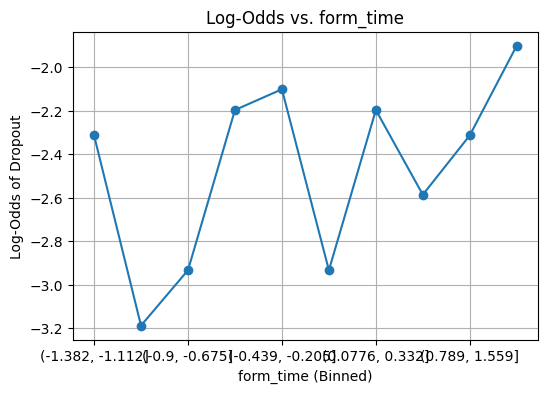

<ipython-input-7-77ca5ba7ca60>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_temp.groupby('bin')[target].mean()


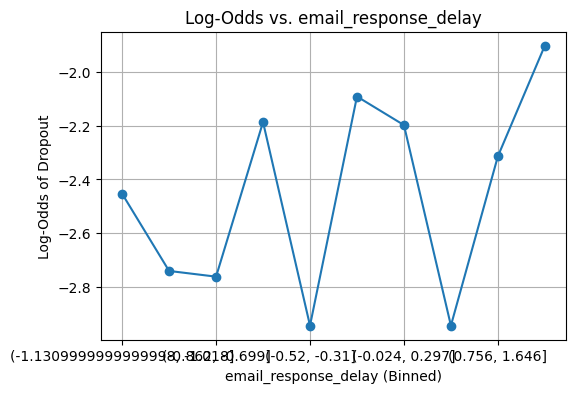

<ipython-input-7-77ca5ba7ca60>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_temp.groupby('bin')[target].mean()


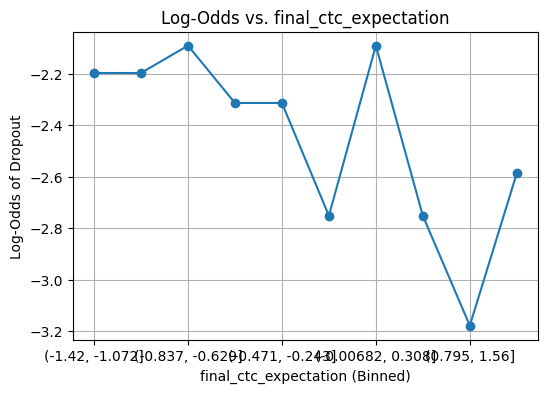

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_log_odds(feature, target='dropout', bins=10):
    df_temp = df.copy()
    df_temp['bin'] = pd.qcut(df_temp[feature], q=bins, duplicates='drop')
    grouped = df_temp.groupby('bin')[target].mean()
    log_odds = np.log(grouped / (1 - grouped))

    plt.figure(figsize=(6, 4))
    log_odds.plot(marker='o')
    plt.title(f'Log-Odds vs. {feature}')
    plt.ylabel('Log-Odds of Dropout')
    plt.xlabel(f'{feature} (Binned)')
    plt.grid(True)
    plt.show()

# Apply to relevant features
features_to_check = ['experience', 'test_score', 'form_time',
                     'email_response_delay', 'final_ctc_expectation']

for feat in features_to_check:
    plot_log_odds(feat)


In [ ]:
def check_separation(feature, target='dropout', bins=10):
    df_temp = df.copy()
    df_temp['bin'] = pd.qcut(df_temp[feature], q=bins, duplicates='drop')
    grouped = df_temp.groupby('bin')[target].mean()
    print(f"\n{feature} — Dropout Probabilities by Bin:\n{grouped.round(2)}")

for feat in features_to_check:
    check_separation(feat)
df['dropout'].value_counts()



experience — Dropout Probabilities by Bin:
bin
(-1.0179999999999998, -0.917]    0.05
(-0.917, -0.816]                 0.11
(-0.816, -0.674]                 0.06
(-0.674, -0.518]                 0.08
(-0.518, -0.296]                 0.06
(-0.296, -0.0802]                0.02
(-0.0802, 0.21]                  0.09
(0.21, 0.678]                    0.16
(0.678, 1.407]                   0.10
(1.407, 4.259]                   0.10
Name: dropout, dtype: float64

test_score — Dropout Probabilities by Bin:
bin
(-2.625, -1.274]     0.14
(-1.274, -0.789]     0.14
(-0.789, -0.582]     0.11
(-0.582, -0.235]     0.08
(-0.235, -0.0277]    0.09
(-0.0277, 0.249]     0.08
(0.249, 0.526]       0.08
(0.526, 0.872]       0.03
(0.872, 1.357]       0.05
(1.357, 1.98]        0.01
Name: dropout, dtype: float64

form_time — Dropout Probabilities by Bin:
bin
(-1.382, -1.112]    0.09
(-1.112, -0.9]      0.04
(-0.9, -0.675]      0.05
(-0.675, -0.439]    0.10
(-0.439, -0.205]    0.11
(-0.205, 0.0776]    0.05
(0.0776

<ipython-input-9-5b82781b94d8>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_temp.groupby('bin')[target].mean()
<ipython-input-9-5b82781b94d8>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_temp.groupby('bin')[target].mean()
<ipython-input-9-5b82781b94d8>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_temp.groupby('bin')[target].mean()
<ipython-input-9-5b82781b94d8>:4: Future

,count
dropout,
0,917
1,83


In [ ]:
# Train the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Defining features and target
X = df.drop(columns=['dropout'])
y = df['dropout']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y,random_state=42)

# Train Logistic Regression (with Regularization)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Getting Coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0],
    'Odds Ratio': np.exp(model.coef_[0])
}).sort_values(by='Odds Ratio', ascending=False)

coef_df


,Feature,Coefficient,Odds Ratio
2,form_time,0.219773,1.245794
0,experience,0.141986,1.152561
7,email_response_delay,0.034919,1.035536
5,timezone_diff,0.004608,1.004619
8,final_ctc_expectation,-0.097210,0.907366
6,past_startups,-0.141328,0.868204
3,follow_ups,-0.379170,0.684429
1,test_score,-0.521231,0.593789
4,is_referred,-1.557695,0.210621


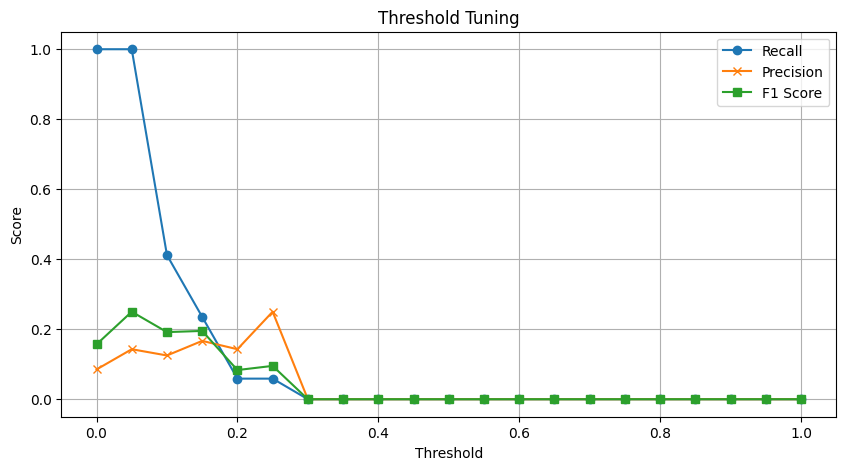

,Threshold,Precision,Recall,F1
0,0.00,0.085000,1.000000,0.156682
1,0.05,0.142857,1.000000,0.250000
2,0.10,0.125000,0.411765,0.191781
3,0.15,0.166667,0.235294,0.195122
4,0.20,0.142857,0.058824,0.083333
5,0.25,0.250000,0.058824,0.095238
6,0.30,0.000000,0.000000,0.000000
7,0.35,0.000000,0.000000,0.000000
8,0.40,0.000000,0.000000,0.000000
9,0.45,0.000000,0.000000,0.000000


In [ ]:
# Search for the best threshold
thresholds = np.arange(0, 1.01, 0.05)
results = []

for t in thresholds:
    y_pred_thresh = (y_pred_prob >= t).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_thresh).ravel()
    precision = tp / (tp + fp) if (tp + fp) else 0
    recall = tp / (tp + fn) if (tp + fn) else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) else 0
    results.append((t, precision, recall, f1))

# Create DataFrame
threshold_df = pd.DataFrame(results, columns=["Threshold", "Precision", "Recall", "F1"])

# Plot
plt.figure(figsize=(10, 5))
plt.plot(threshold_df["Threshold"], threshold_df["Recall"], label="Recall", marker='o')
plt.plot(threshold_df["Threshold"], threshold_df["Precision"], label="Precision", marker='x')
plt.plot(threshold_df["Threshold"], threshold_df["F1"], label="F1 Score", marker='s')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Threshold Tuning")
plt.legend()
plt.grid(True)
plt.show()

threshold_df


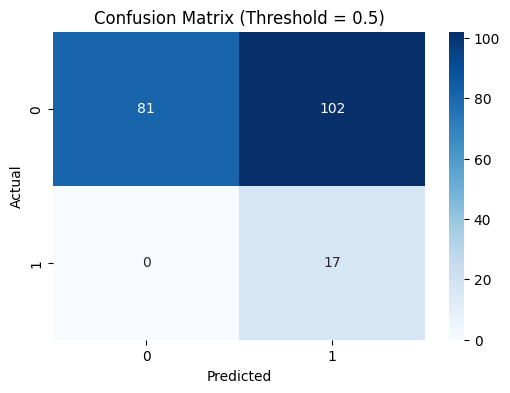

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.44      0.61       183
           1       0.14      1.00      0.25        17

    accuracy                           0.49       200
   macro avg       0.57      0.72      0.43       200
weighted avg       0.93      0.49      0.58       200



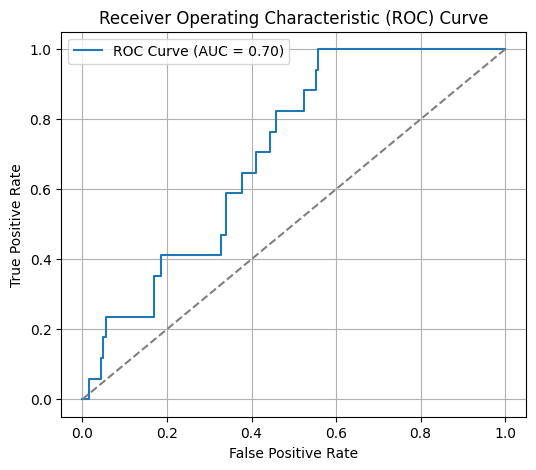

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Getting predicted probabilities
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Selecting threshold
y_pred = (y_pred_prob >= 0.05).astype(int)

# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Threshold = 0.5)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 2. Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# 3. ROC Curve & AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()
